<a href="https://colab.research.google.com/github/leihuang/scrapbook/blob/master/PytorchReproducibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import tqdm


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
X, y = make_moons(n_samples=100, noise=0.1, random_state=SEED)

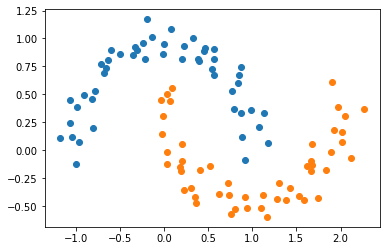

In [3]:
fig, ax = plt.subplots()
ax.scatter(*X[y==0].T)
ax.scatter(*X[y==1].T)
plt.show()

In [4]:
class Model(nn.Module):
    def __init__(self, width):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(2, width)
        self.layer2 = nn.Linear(width, 2)
        self.layer3 = nn.Linear(2, 1)
        
    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        p = torch.sigmoid(self.layer3(x))[:,0]
        return p


def train_and_validate(model, optimizer, loss_fn, X_train, y_train, X_test, y_test, nepoch):
    """
    """
    losss = []
    accus = []
    ps = []

    for epoch in tqdm.trange(nepoch):
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        losss.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            y_pred = model(X_test)
            bools = ((y_pred>0.5).long() == y_test).type(torch.FloatTensor)
            accus.append(bools.mean())

    return np.array(losss), np.array(accus)


def plot_losss_accus(losss, accus):
    """
    """
    fig, ax = plt.subplots(figsize=(4,3))
    ax.plot(losss, color='r')
    ax.set_ylim(bottom=0)
    ax.set_ylabel('Loss')
    ax2 = ax.twinx()
    ax2.plot(accus, color='b')
    ax2.set_ylabel('Accuracy')
    ax2.set_ylim(0, 1.05)
    plt.show()

100%|██████████| 500/500 [00:00<00:00, 525.53it/s]


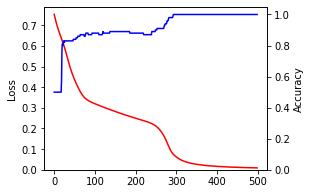

In [5]:
model = Model(5)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.BCELoss()

X_ = Variable(torch.from_numpy(X)).float()
y_ = Variable(torch.from_numpy(y)).float()

losss, accus = train_and_validate(model, optimizer, loss_fn, X_, y_, X_, y_, 500)

plot_losss_accus(losss, accus)

100%|██████████| 500/500 [00:00<00:00, 546.00it/s]


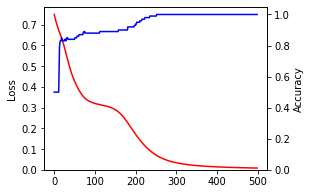

In [6]:
model = Model(5)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.BCELoss()

X_ = Variable(torch.from_numpy(X)).float()
y_ = Variable(torch.from_numpy(y)).float()

losss, accus = train_and_validate(model, optimizer, loss_fn, X_, y_, X_, y_, 500)

plot_losss_accus(losss, accus)

In [7]:
from torch.utils.data import Dataset, DataLoader


class MyDataset(Dataset):
    def __init__(self, size):
        self.x = torch.randn(size, 1)
    
    def __getitem__(self, index):
        return self.x[index]

    def __len__(self):
        return len(self.x)

dataset = MyDataset(1001)

data_loader = DataLoader(dataset,
                         batch_size=10)

len(data_loader)

for batch_idx, data in enumerate(data_loader):
    print('batch idx{}, batch len {}'.format(
        batch_idx, len(data)))

data_loader = DataLoader(dataset,
                     batch_size=10,
                     drop_last=True)

len(data_loader)

for batch_idx, data in enumerate(data_loader):
    print('batch idx{}, batch len {}'.format(
        batch_idx, len(data)))

batch idx0, batch len 10
batch idx1, batch len 10
batch idx2, batch len 10
batch idx3, batch len 10
batch idx4, batch len 10
batch idx5, batch len 10
batch idx6, batch len 10
batch idx7, batch len 10
batch idx8, batch len 10
batch idx9, batch len 10
batch idx10, batch len 10
batch idx11, batch len 10
batch idx12, batch len 10
batch idx13, batch len 10
batch idx14, batch len 10
batch idx15, batch len 10
batch idx16, batch len 10
batch idx17, batch len 10
batch idx18, batch len 10
batch idx19, batch len 10
batch idx20, batch len 10
batch idx21, batch len 10
batch idx22, batch len 10
batch idx23, batch len 10
batch idx24, batch len 10
batch idx25, batch len 10
batch idx26, batch len 10
batch idx27, batch len 10
batch idx28, batch len 10
batch idx29, batch len 10
batch idx30, batch len 10
batch idx31, batch len 10
batch idx32, batch len 10
batch idx33, batch len 10
batch idx34, batch len 10
batch idx35, batch len 10
batch idx36, batch len 10
batch idx37, batch len 10
batch idx38, batch len